In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")

import json
from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.2f}".format 

## Este grupo de clientes es el 0, lo que parecen clientes con menor relevancia en las variables analizadas, es decir,  posiblemente son clientes con menor representación. Aunque este grupo de clientes es el que pide mas productos que los de los otros clusters. Además son lo que compran las subcategorías menos frecuentes (Ej: Appliances).  

In [2]:
df_crudo=pd.read_csv("..\..\..\datos\datos0\datos_clusterizados0.csv")


In [3]:
df_crudo.head()

,customer_ID,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
0,CR-12730,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",entre 9 y 10,0.10,919.97,915.49,Medium,0
1,KM-16375,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",entre 5 y 6,0.10,-96.54,910.16,Medium,0
2,JM-15655,22732,IN-2013-42360,28-06-2013,01-07-2013,Second Class,Jim Mitchum,Corporate,Sydney,New South Wales,Australia,APAC,Oceania,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID","2,862.68",entre 5 y 6,0.10,763.27,897.35,Critical,0
3,BP-11185,13779,ES-2014-5099955,31-07-2014,03-08-2014,Second Class,Ben Peterman,Corporate,Paris,Ile-de-France,France,EU,Central,OFF-AP-10000423,Office Supplies,Appliances,"Breville Refrigerator, Red","1,869.59",entre 3 y 4,0.10,186.95,801.66,Critical,0
4,VD-21670,3484,MX-2014-165309,05-09-2014,08-09-2014,First Class,Valerie Dominguez,Consumer,Soyapango,San Salvador,El Salvador,LATAM,Central,FUR-TA-10002827,Furniture,Tables,"Hon Computer Table, Fully Assembled","2,106.50",entre 7 y 8,0.20,526.50,728.39,Critical,0


In [4]:
f.exploracion_dataframe(df_crudo, "Sales", estadisticos = False)

El número de datos es 9080 y el de columnas es 24

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
customer_ID,object
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer Name,object
Segment,object
City,object
State,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna CUSTOMER_ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1298 categorías (5/1298)


,count
customer_ID,
TC-21145,29
JH-15985,28
SV-20935,28
CD-11980,27
TP-21130,27


La columna ORDER ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 4522 categorías (5/4522)


,count
Order ID,
IN-2012-41261,13
MX-2013-134453,11
IN-2014-78151,11
SA-2013-7790,11
IN-2014-19274,10


La columna ORDER DATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1235 categorías (5/1235)


,count
Order Date,
11-06-2014,36
28-11-2014,31
11-12-2014,29
17-06-2013,28
24-06-2014,27


La columna SHIP DATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1336 categorías (5/1336)


,count
Ship Date,
29-11-2014,34
11-11-2013,32
11-11-2014,32
16-12-2014,29
14-02-2014,29


La columna SHIP MODE tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Ship Mode,
Standard Class,5544
Second Class,1660
First Class,1379
Same Day,497


La columna CUSTOMER NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 792 categorías (5/792)


,count
Customer Name,
Maureen Gastineau,31
Carol Darley,31
Theresa Coyne,30
Joseph Holt,30
Theone Pippenger,29


La columna SEGMENT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Segment,
Consumer,4651
Corporate,2696
Home Office,1733


La columna CITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 48 categorías (5/48)


,count
City,
Santo Domingo,443
Manila,432
Tegucigalpa,362
Jakarta,337
Managua,336


La columna STATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 45 categorías (5/45)


,count
State,
Santo Domingo,443
National Capital,432
Queensland,379
Francisco Morazán,362
San Salvador,348


La columna COUNTRY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 36 categorías (5/36)


,count
Country,
Australia,1364
Honduras,533
Indonesia,472
Dominican Republic,443
Philippines,432


La columna MARKET tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 6 categorías (5/6)


,count
Market,
APAC,3106
LATAM,2969
EU,1287
Africa,1013
EMEA,681


La columna REGION tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


,count
Region,
Central,2391
Southeast Asia,1647
Oceania,1364
Africa,1013
North,681


La columna PRODUCT ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 4992 categorías (5/4992)


,count
Product ID,
OFF-SAN-10004881,10
OFF-BI-10000089,8
OFF-ST-10002714,7
OFF-BI-10000179,7
OFF-AR-10003875,7


La columna CATEGORY tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Category,
Office Supplies,5364
Technology,1886
Furniture,1830


La columna SUB-CATEGORY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


,count
Sub-Category,
Binders,923
Art,793
Storage,769
Chairs,707
Accessories,556


La columna PRODUCT NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1872 categorías (5/1872)


,count
Product Name,
"Stockwell Paper Clips, Assorted Sizes",23
"Ibico Index Tab, Clear",22
"Avery Index Tab, Clear",20
"Acco Index Tab, Clear",19
"Cardinal Index Tab, Clear",18


La columna QUANTITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 8 categorías (5/8)


,count
Quantity,
entre 1 y 2,3855
entre 3 y 4,2859
entre 5 y 6,1403
entre 7 y 8,653
entre 9 y 10,201


La columna ORDER PRIORITY tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Order Priority,
Medium,5258
High,2669
Critical,650
Low,503



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Row ID,"9,080.00","21,326.34","14,928.55",1.00,"7,756.75","21,286.50","28,840.25","51,290.00"
Sales,"9,080.00",240.66,433.96,1.20,32.68,86.38,252.04,"5,759.96"
Discount,"9,080.00",0.20,0.21,0.00,0.00,0.10,0.40,0.80
Profit,"9,080.00",13.82,148.78,"-3,009.43",-8.73,4.32,26.88,"2,316.51"
Shipping Cost,"9,080.00",26.15,56.50,0.01,2.76,7.90,24.65,915.49
cluster,"9,080.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
customer_ID,9080,1298,TC-21145,29
Order ID,9080,4522,IN-2012-41261,13
Order Date,9080,1235,11-06-2014,36
Ship Date,9080,1336,29-11-2014,34
Ship Mode,9080,4,Standard Class,5544
Customer Name,9080,792,Maureen Gastineau,31
Segment,9080,3,Consumer,4651
City,9080,48,Santo Domingo,443
State,9080,45,Santo Domingo,443
Country,9080,36,Australia,1364



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_ID     9080 non-null   object 
 1   Row ID          9080 non-null   int64  
 2   Order ID        9080 non-null   object 
 3   Order Date      9080 non-null   object 
 4   Ship Date       9080 non-null   object 
 5   Ship Mode       9080 non-null   object 
 6   Customer Name   9080 non-null   object 
 7   Segment         9080 non-null   object 
 8   City            9080 non-null   object 
 9   State           9080 non-null   object 
 10  Country         9080 non-null   object 
 11  Market          9080 non-null   object 
 12  Region          9080 non-null   object 
 13  Product ID      9080 non-null   object 
 14  Category        9080 non-null   object 
 15  Sub-Category    9080 non-null   object 
 16  Product Name  

None

### Eliminamos las columnas que no se consideran importantes

In [5]:
df_crudo.head(1)

,customer_ID,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
0,CR-12730,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",entre 9 y 10,0.10,919.97,915.49,Medium,0


In [6]:
lista_eliminar0=["customer_ID", "Row ID", "Order ID", "Ship Date", "Customer Name", "State", "Market", "Region", "Product ID", "Product Name", "Profit", "Shipping Cost", "cluster"]

In [7]:
df_crudo.drop(columns=lista_eliminar0, inplace=True)

In [8]:
df_crudo.head(1)

,Order Date,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority
0,17-10-2013,First Class,Consumer,Brisbane,Australia,Technology,Phones,"5,175.17",entre 9 y 10,0.10,Medium


### Formateamos order date para sacar el month y eliminamos Order date

In [9]:
df_crudo["Order Date"]= pd.to_datetime(df_crudo['Order Date'])

In [10]:
df_crudo["month"]=df_crudo["Order Date"].dt.month_name()

In [11]:
df_crudo.head(1)

,Order Date,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
0,2013-10-17,First Class,Consumer,Brisbane,Australia,Technology,Phones,"5,175.17",entre 9 y 10,0.10,Medium,October


In [12]:
df_crudo.drop(columns="Order Date", inplace=True)

In [13]:
df_crudo.head(1)

,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
0,First Class,Consumer,Brisbane,Australia,Technology,Phones,"5,175.17",entre 9 y 10,0.10,Medium,October


### *Duplicados*

In [14]:
df_crudo[df_crudo.duplicated()]

,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
1052,First Class,Consumer,Bangkok,Thailand,Furniture,Chairs,343.83,entre 5 y 6,0.27,Medium,November
4354,Standard Class,Consumer,Villa Nueva,Guatemala,Technology,Phones,164.20,entre 1 y 2,0.00,Medium,April
5017,Standard Class,Consumer,Vienna,Austria,Furniture,Chairs,114.78,entre 1 y 2,0.00,Medium,December
6557,Standard Class,Home Office,Madrid,Spain,Office Supplies,Binders,83.97,entre 3 y 4,0.00,Medium,June
9047,Standard Class,Consumer,Istanbul,Turkey,Office Supplies,Binders,3.35,entre 1 y 2,0.60,Medium,January
9068,Standard Class,Corporate,Lagos,Nigeria,Office Supplies,Binders,2.45,entre 1 y 2,0.70,Medium,December


In [15]:
df_crudo.drop_duplicates(inplace=True)
df_crudo.reset_index(drop=True, inplace=True)

In [16]:
df_crudo.duplicated().sum()

0

Como es muy raro que una orden sea exactamente igual a otra y dado que solo hay 6, decido eliminar los duplicados

In [17]:
df_crudo["Discount"].unique()

array([0.1  , 0.2  , 0.   , 0.25 , 0.17 , 0.27 , 0.3  , 0.07 , 0.4  ,
       0.002, 0.5  , 0.35 , 0.15 , 0.6  , 0.57 , 0.37 , 0.47 , 0.402,
       0.7  , 0.55 , 0.202, 0.8  , 0.45 ])

### Convierto Sales en Sales unitario porque le veo más sentido a que me dé el agregado

In [18]:
df_crudo["Quantity_mean"] = df_crudo["Quantity"].str.extract(r"(\d+)\D+(\d+)").astype(float).mean(axis=1)
df_crudo["Sales_unitario"] = df_crudo["Sales"] / df_crudo["Quantity_mean"]
df_crudo.head()

,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month,Quantity_mean,Sales_unitario
0,First Class,Consumer,Brisbane,Australia,Technology,Phones,"5,175.17",entre 9 y 10,0.10,Medium,October,9.50,544.75
1,First Class,Home Office,Berlin,Germany,Technology,Phones,"2,892.51",entre 5 y 6,0.10,Medium,January,5.50,525.91
2,Second Class,Corporate,Sydney,Australia,Technology,Phones,"2,862.68",entre 5 y 6,0.10,Critical,June,5.50,520.49
3,Second Class,Corporate,Paris,France,Office Supplies,Appliances,"1,869.59",entre 3 y 4,0.10,Critical,July,3.50,534.17
4,First Class,Consumer,Soyapango,El Salvador,Furniture,Tables,"2,106.50",entre 7 y 8,0.20,Critical,September,7.50,280.87


In [19]:
df_crudo.drop(columns=["Sales", "Quantity_mean"], inplace=True)

### Vamos a hacer algunas visualizaciones

In [20]:
visualizador=f.Visualizador(df_crudo)

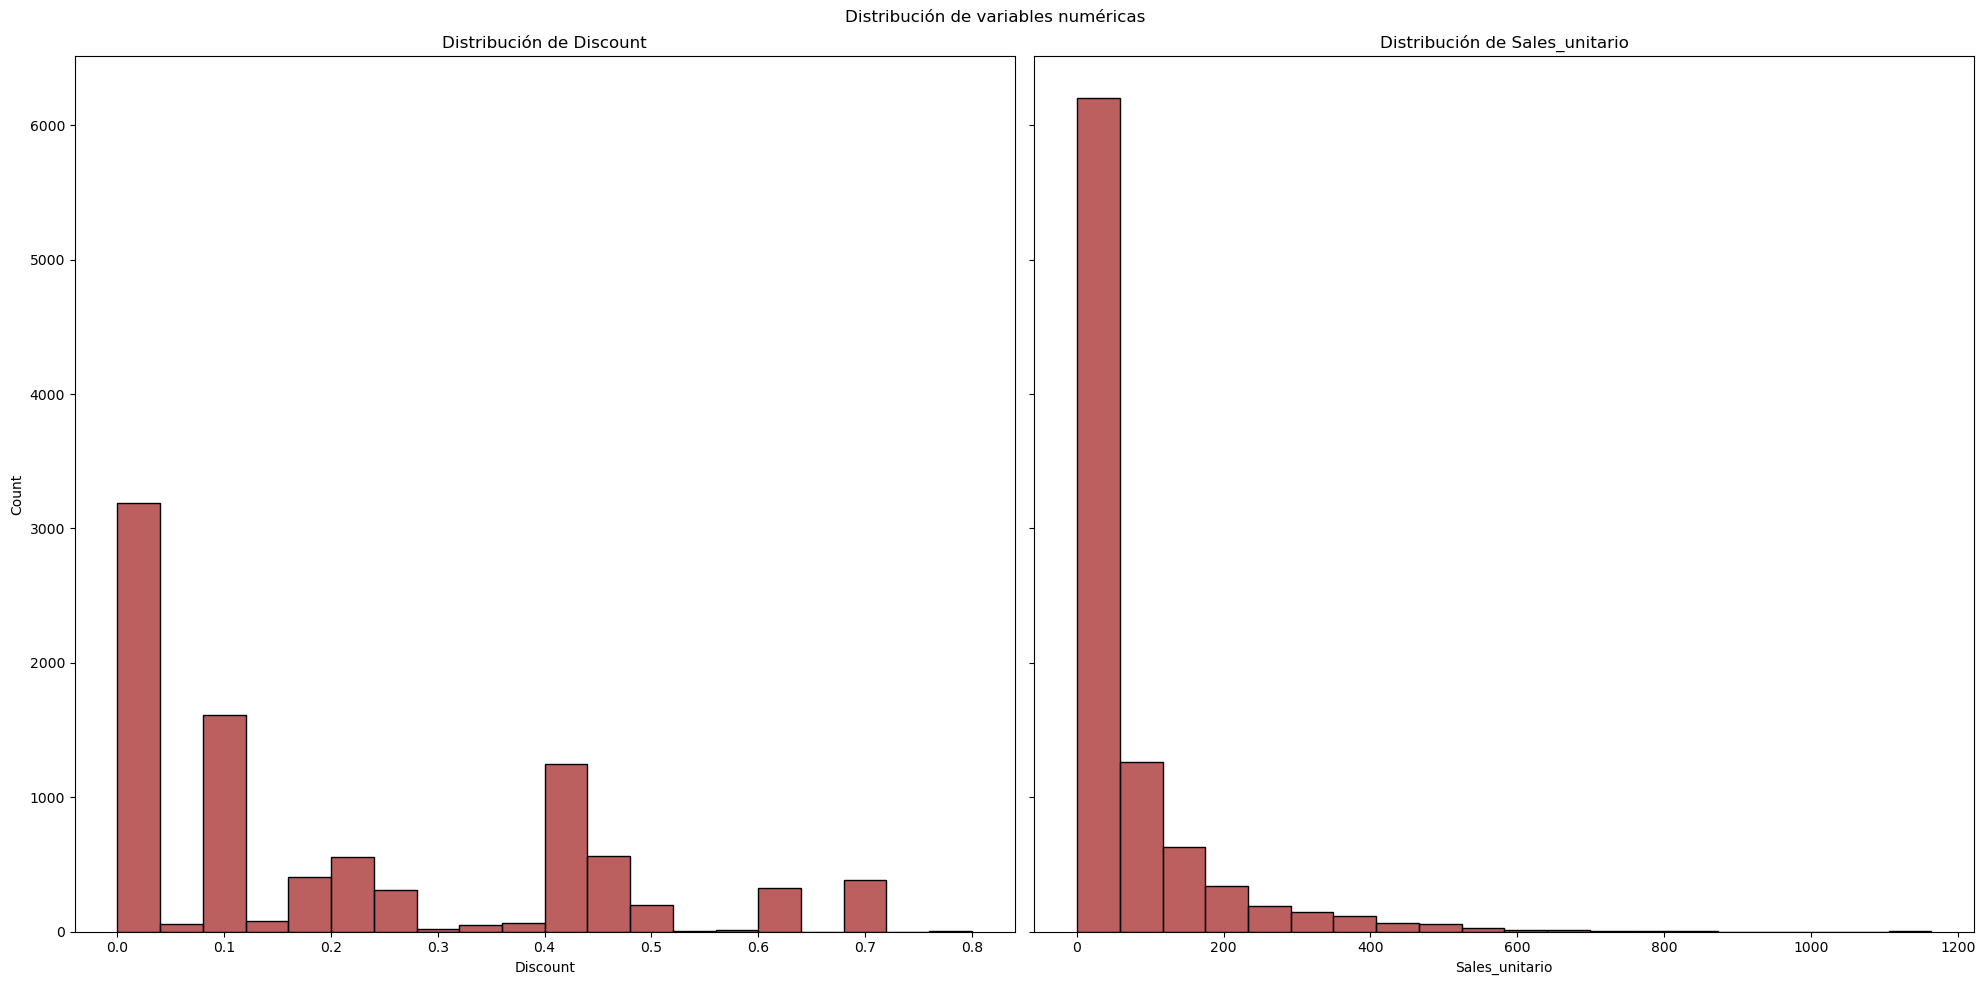

In [21]:
visualizador.plot_numericas(color="brown")

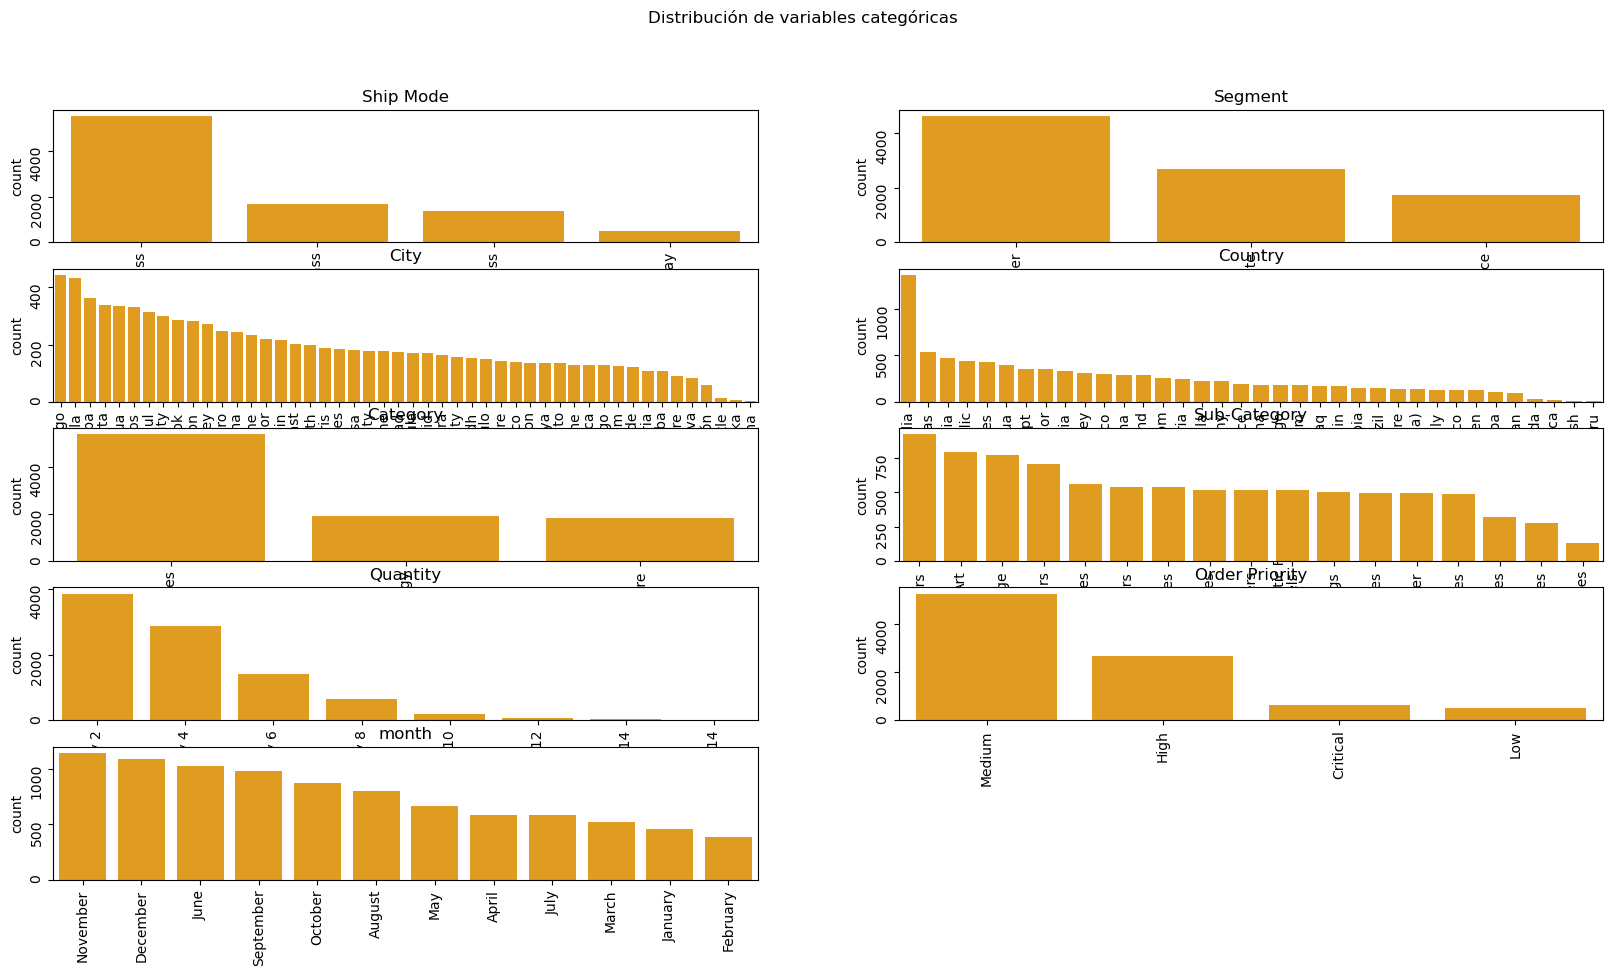

In [22]:
visualizador.plot_categoricas(color="orange")

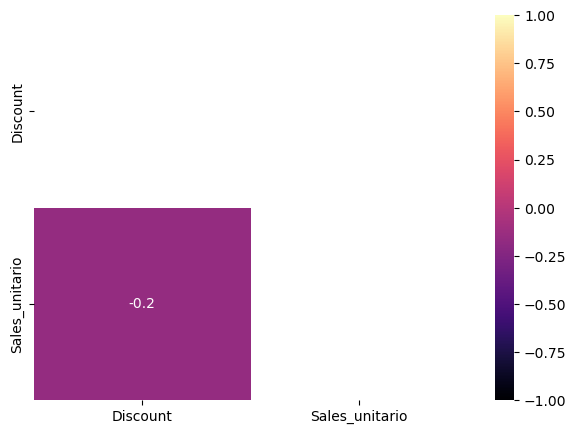

In [ ]:
visualizador.correlacion()

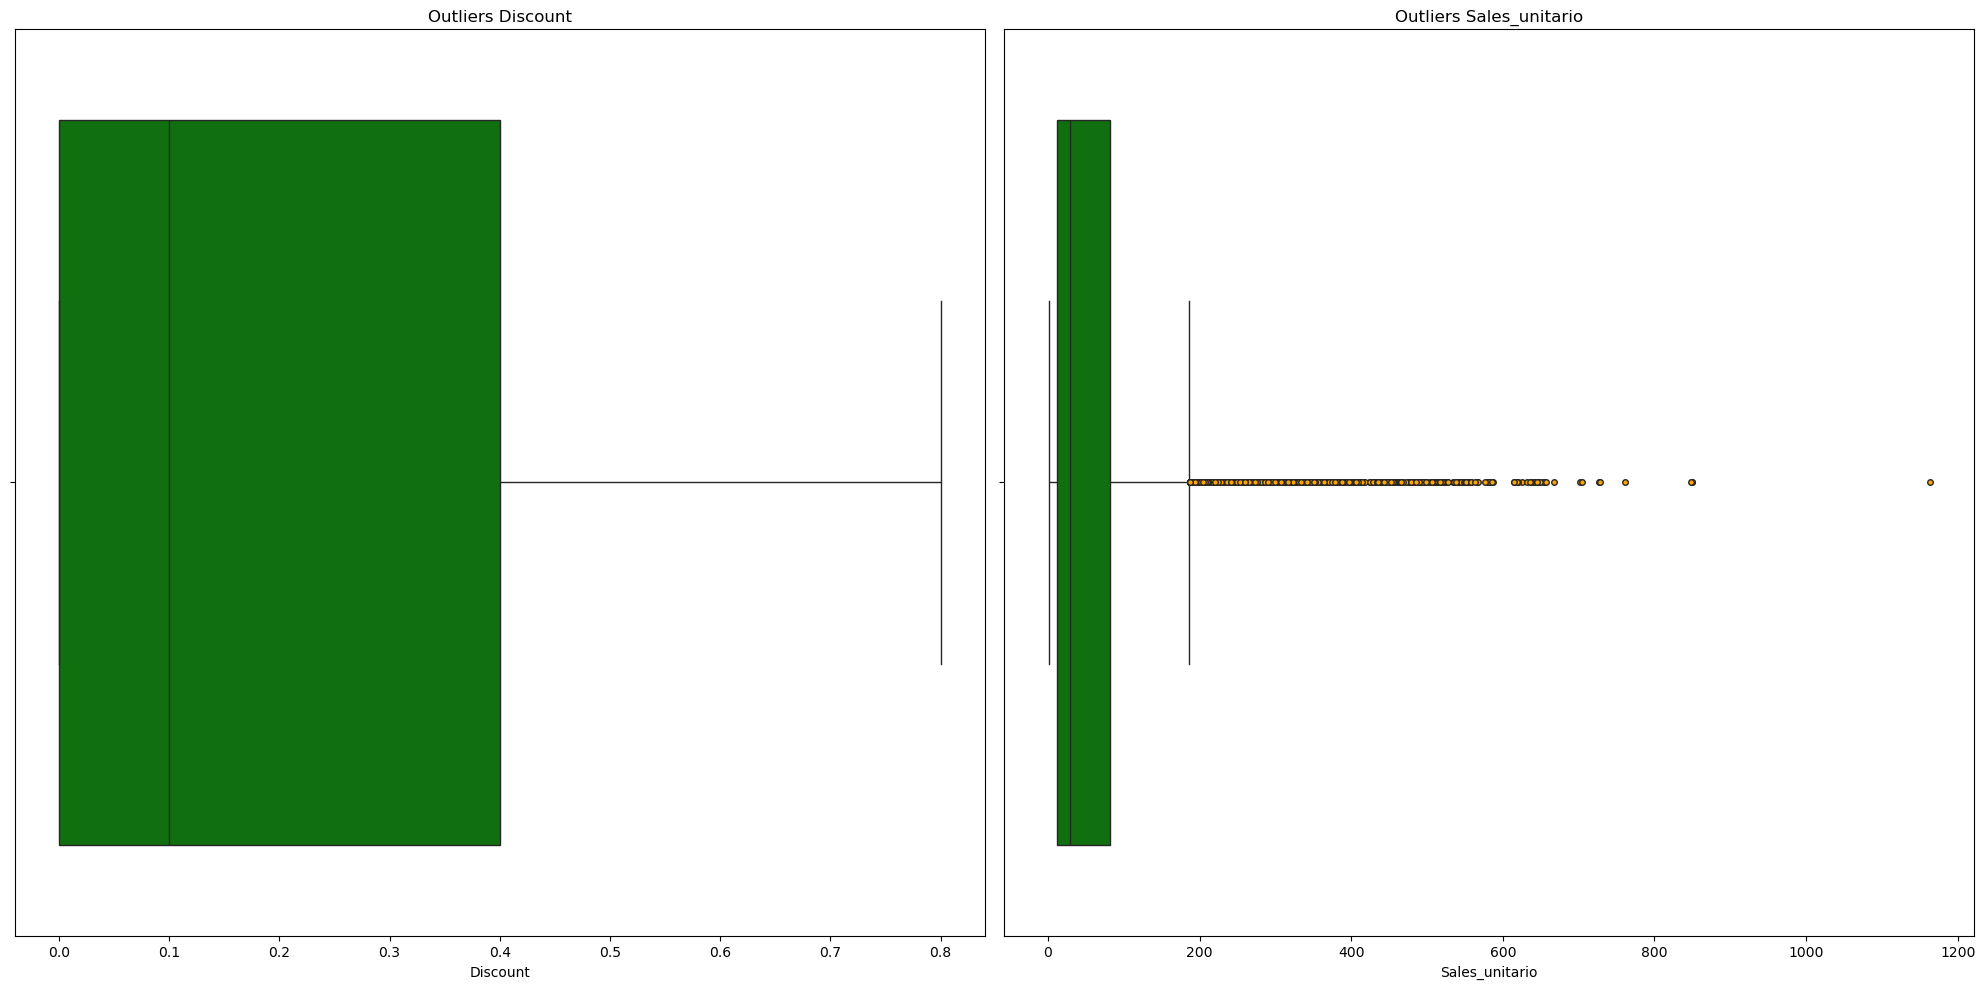

In [23]:
visualizador.deteccion_outliers(color="green")

### Comprobación de los outliers 

In [30]:
df_crudo[df_crudo["Sales_unitario"] > 800]

,Ship Mode,Segment,City,Country,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
36,First Class,Consumer,Cairo,Egypt,Technology,Phones,entre 1 y 2,0.00,Critical,March,849.80
240,Second Class,Consumer,Cairo,Egypt,Technology,Phones,entre 1 y 2,0.00,High,May,849.80
423,Standard Class,Consumer,Riyadh,Saudi Arabia,Technology,Phones,entre 1 y 2,0.00,High,October,848.20
571,Second Class,Consumer,Casablanca,Morocco,Furniture,Tables,entre 1 y 2,0.00,Medium,August,"1,163.56"


In [26]:
df_crudo[df_crudo["Sales_unitario"] > 600]

,Ship Mode,Segment,City,Country,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
9,Second Class,Consumer,London,United Kingdom,Technology,Phones,entre 5 y 6,0.10,High,September,625.76
11,Same Day,Home Office,Casablanca,Morocco,Office Supplies,Appliances,entre 3 y 4,0.00,Medium,November,647.55
15,Standard Class,Consumer,Kinshasa,Democratic Republic of the Congo,Technology,Phones,entre 5 y 6,0.00,Low,July,701.12
16,Standard Class,Corporate,Perth,Australia,Technology,Phones,entre 5 y 6,0.10,Low,November,640.81
36,First Class,Consumer,Cairo,Egypt,Technology,Phones,entre 1 y 2,0.00,Critical,March,849.80
95,Same Day,Consumer,Vienna,Austria,Furniture,Tables,entre 1 y 2,0.00,Critical,September,615.30
99,Standard Class,Consumer,Casablanca,Morocco,Technology,Phones,entre 3 y 4,0.00,High,August,727.03
103,First Class,Corporate,São Paulo,Brazil,Furniture,Tables,entre 1 y 2,0.20,Medium,July,653.55
127,Standard Class,Consumer,Alexandria,Egypt,Office Supplies,Appliances,entre 3 y 4,0.00,Medium,August,641.11
233,Standard Class,Home Office,Cairo,Egypt,Technology,Phones,entre 3 y 4,0.00,Medium,July,728.57


In [33]:
df_crudo[df_crudo["Sales_unitario"] > 200].sample(3)

,Ship Mode,Segment,City,Country,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
1162,Standard Class,Consumer,Mexico City,Mexico,Furniture,Tables,entre 1 y 2,0.20,Medium,November,656.83
1285,Same Day,Home Office,Tegucigalpa,Honduras,Office Supplies,Appliances,entre 3 y 4,0.40,Medium,December,259.87
1867,Standard Class,Consumer,Canberra,Australia,Technology,Copiers,entre 1 y 2,0.00,Medium,October,316.80


In [34]:
df_crudo[df_crudo["Sales_unitario"] < 200].sample(3)

,Ship Mode,Segment,City,Country,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
6257,Standard Class,Consumer,Cairo,Egypt,Office Supplies,Binders,entre 1 y 2,0.00,High,June,19.66
5637,Standard Class,Corporate,Alexandria,Egypt,Office Supplies,Envelopes,entre 1 y 2,0.00,Medium,November,32.44
1198,Standard Class,Consumer,Surabaya,Indonesia,Furniture,Chairs,entre 5 y 6,0.27,Medium,December,104.67


In [32]:
(df_crudo["Sales_unitario"] <200).sum()

8266

In [28]:
(df_crudo["Sales_unitario"] >200).sum()

808

In [29]:
df_crudo.shape

(9074, 11)

In [38]:
df_crudo.to_csv("..\..\..\datos\datos0\datos_clusterizados0_sin_nulos.csv")